# 用雷达图进行对比分析

### 1. 初始设置

首先，导入所需的库，并设置中文字体等。

In [1]:
# 导入所需的库
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as image

# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']

# 自动适应布局
mpl.rcParams.update({'figure.autolayout': True})

# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False

# 禁用科学计数法
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

# 定义颜色，主色：蓝色，辅助色：灰色，互补色：橙色
c = {'蓝色':'#00589F', '深蓝色':'#003867', '浅蓝色':'#5D9BCF',
     '灰色':'#999999', '深灰色':'#666666', '浅灰色':'#CCCCCC',
     '橙色':'#F68F00', '深橙色':'#A05D00', '浅橙色':'#FBC171'}

### 2. 定义数据

In [2]:
# 数据源路径
filepath='./data/林骥的学分构成.xlsx'

# 读取 Excel文件
df = pd.read_excel(filepath)

# 提取画图所需的数据
data0 = df.iloc[0, 2:].values
data1 = df.iloc[1, 2:].values

#提取标签
label = np.array(df.iloc[1, 2:].index)

# 根据分数添加评级的标签
for i, d in enumerate(data1):
    if d > 4:
        grade = 'A^+'
    elif d == 4:
        grade = 'A'
    elif d > 3:
        grade = 'B^+'
    elif d == 3:
        grade = 'B'
    else:
        grade = 'B^-'
    label[i] += '\n' + r'$\bf{' + grade + '}$'
    

# data 里有几个数据，就把整圆 360° 分成几份
angle = np.linspace(0, 2*np.pi, len(data0), endpoint=False)

# 增加第一个 angle 到所有 angle 里，以实现闭合
angles = np.concatenate((angle, [angle[0]]))

# 倒转顺序，以让雷达图顺时针显示
angles = angles[::-1]

#增加第一个 data 到所有的 data 里，以实现闭合
data0 = np.concatenate((data0, [data0[0]]))
data1 = np.concatenate((data1, [data1[0]]))

### 3. 开始画图

用「**面向对象**」的方法画图。

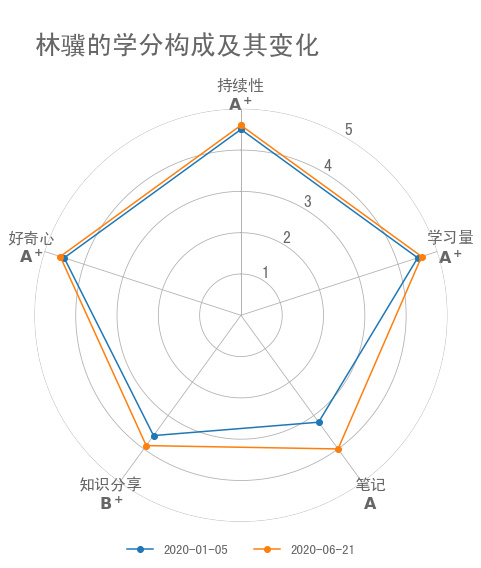

In [3]:
# 使用「面向对象」的方法画图，定义图片的大小
fig, ax=plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 设置背景颜色
fig.set_facecolor('w')
ax.set_facecolor('w')

# 设置标题
ax.set_title('\n林骥的学分构成及其变化\n\n', fontsize=26, loc='left', color=c['深灰色']) 

# 设置网格标签
ax.set_thetagrids(angles*180/np.pi, labels=label)

# 画雷达图，用顺时针显示
ax.plot(angles, data0, 'o-', label=df.iloc[0, 0].strftime('%Y-%m-%d'))
ax.plot(angles, data1, 'o-', label=df.iloc[1, 0].strftime('%Y-%m-%d'))

# 设置极坐标 0° 的位置
ax.set_theta_zero_location('N') 

# 设置显示的极径范围
ax.set_rlim(0, 5)

# 填充颜色
# ax.fill(angles, data0, facecolor=c['浅蓝色'], alpha=0.6)
# ax.fill(angles, data1, facecolor=c['浅橙色'], alpha=0.6)

# 设置极径标签，放在第一象限的中间位置
ax.set_rlabel_position(360-360/len(data0)/2)

# 设置图例显示的位置
l = ax.legend(ncol=2, loc='lower center', frameon=False, borderaxespad=-3, fontsize=13)
for text in l.get_texts():
    text.set_color(c['深灰色'])
#     text.set_size(13)

# 去掉最外围的黑圈
ax.spines['polar'].set_visible(False) 

# 设置坐标标签字体大小和颜色
ax.tick_params(labelsize=16, colors=c['深灰色'])

plt.show()